# Muon flux rate for qubic muon detector

## 1) Muon flux rate vs altitude

In the "Cosmic rays at earth" by Grieder, we found the following interesting diagram, plotting the muon 
integral intensity in function of the pressure found on page 247.

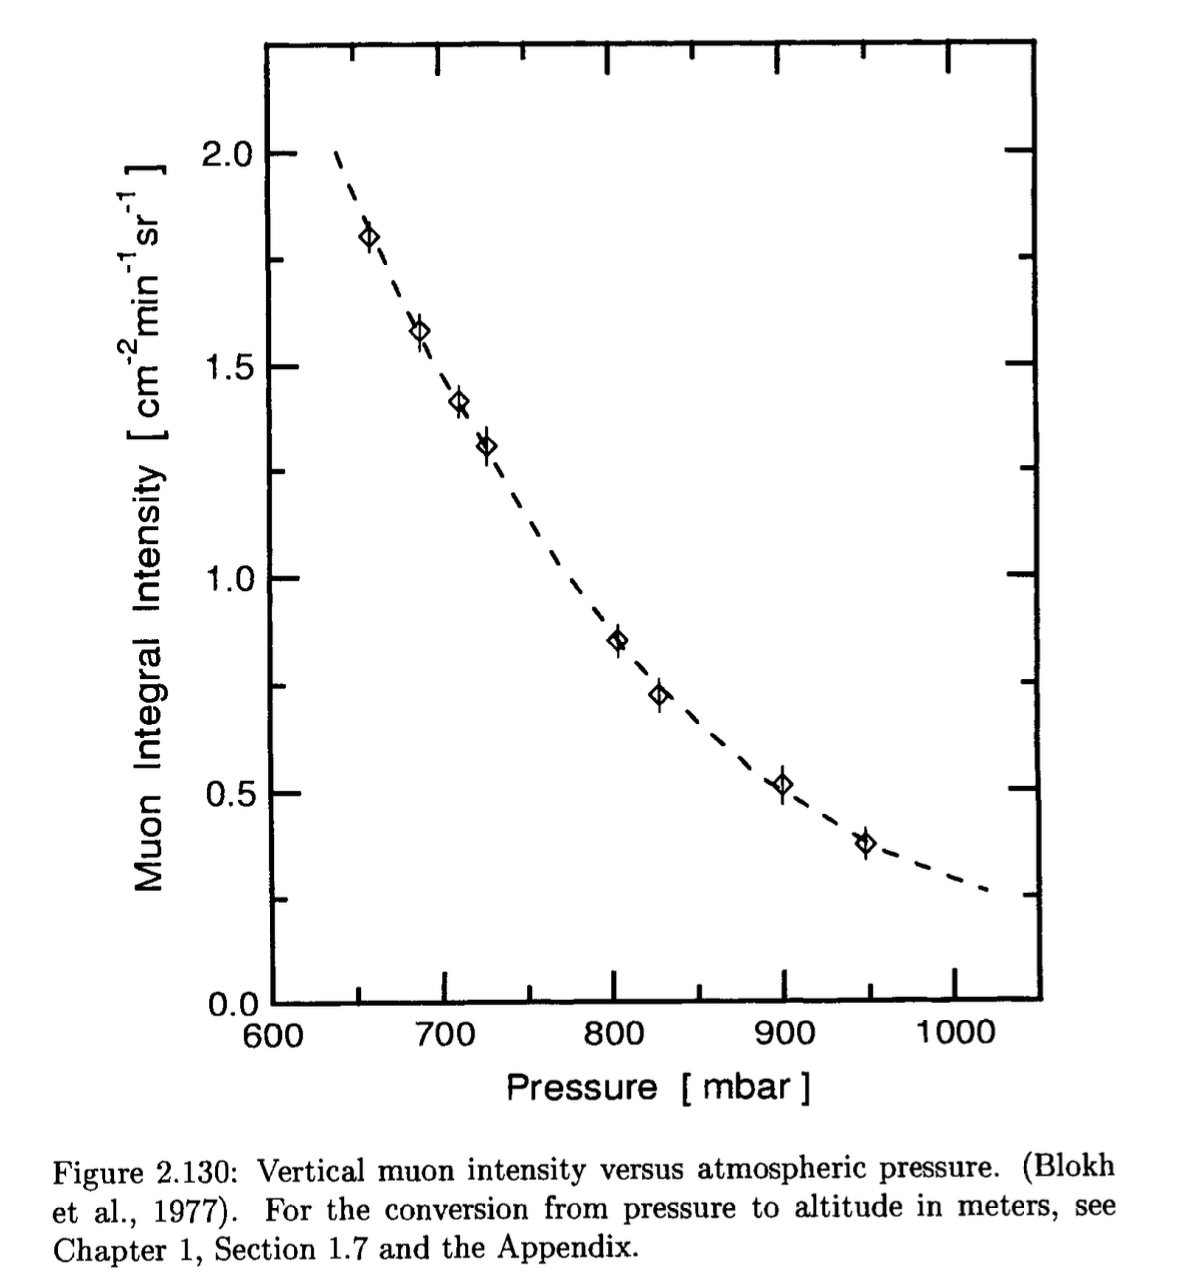

In [1]:
from IPython.display import Image

fig = Image(filename=('./Plot_mf_pressure.png'),width=500, height=500)
fig

We replot the diagram in the following cell.

a: 51.99369152199625
b: -0.005094931669712983
c: 0.023258014716212302
d: -0.01903345390590733


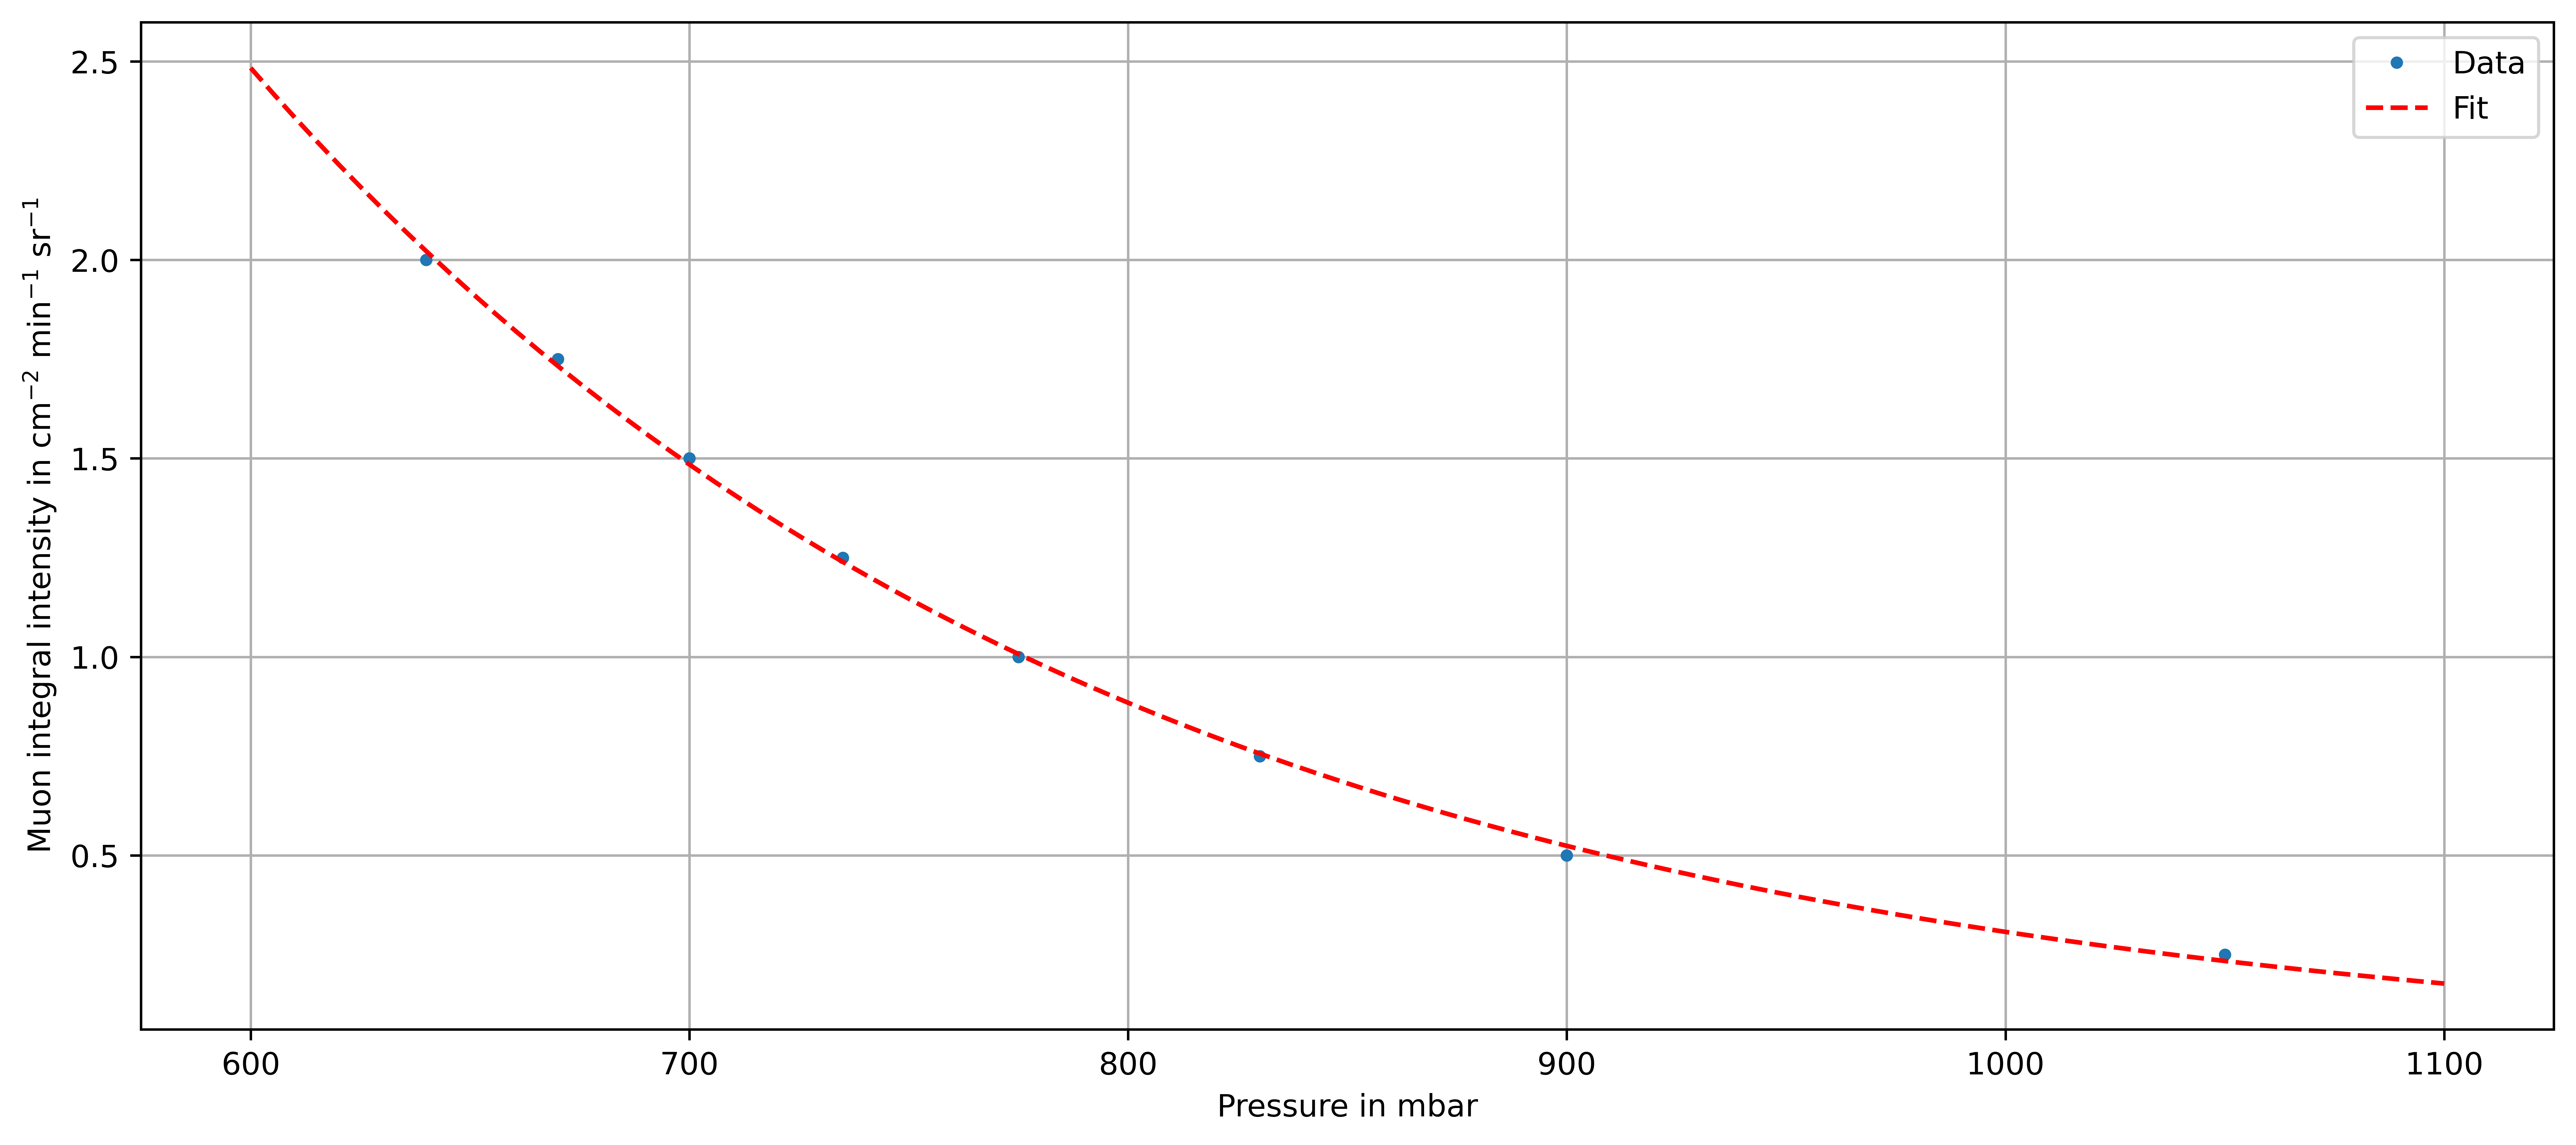

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Remember 1 Pascal = 0.01 mbar

x  = np.array([640, 670, 700, 735, 775, 830,900,1050]) #pressure in mbar
y = np.array([2, 1.75, 1.5, 1.25, 1, 0.75, 0.5, 0.25]) #muon integral intensity

a_guess = 2
b_guess = -0.2
c_guess = 200
d_guess = 1

# Fit the function a * np.exp(b * t + c) + d to x and y
popt, pcov = curve_fit(
    lambda t, a, b, c,d : a * np.exp(b * t + c) + d,
    x, y, p0=(a_guess, b_guess, c_guess, d_guess))

# The optimised values of the parameters are
a = popt[0]
b = popt[1]
c = popt[2]
d = popt[3]


# Fitting parameters
print("a:", a)
print("b:", b)
print("c:", c)
print("d:", d)


# Create the fitted curve
x_fitted = np.linspace(600, 1100, 100)
y_fitted = a * np.exp(b * x_fitted + c) + d

plt.figure(figsize=(14, 6), dpi=800)
plt.plot(x, y, ".", label = "Data")
plt.plot(x_fitted, y_fitted, '--', color='red', label = "Fit")
plt.legend()
plt.xlabel("Pressure in mbar")
plt.ylabel("Muon integral intensity in cm$^{-2}$ min$^{-1}$ sr$^{-1}$")
plt.grid()
plt.show()

So we have the relation:

$y = 51.994 \cdot e^{(-0.005 \cdot x + 0.023)} -0.019$


For the conversion from pressure to altitude in meters, we have the following relation.

Air pressure above sea level can be calculated as:

$p = 101325 (1 - 2.25577*10^{-5} h)^{5.25588} $, where

101325 = normal temperature and pressure at sea level (Pa)

p = air pressure (Pa)

h = altitude above sea level (m)


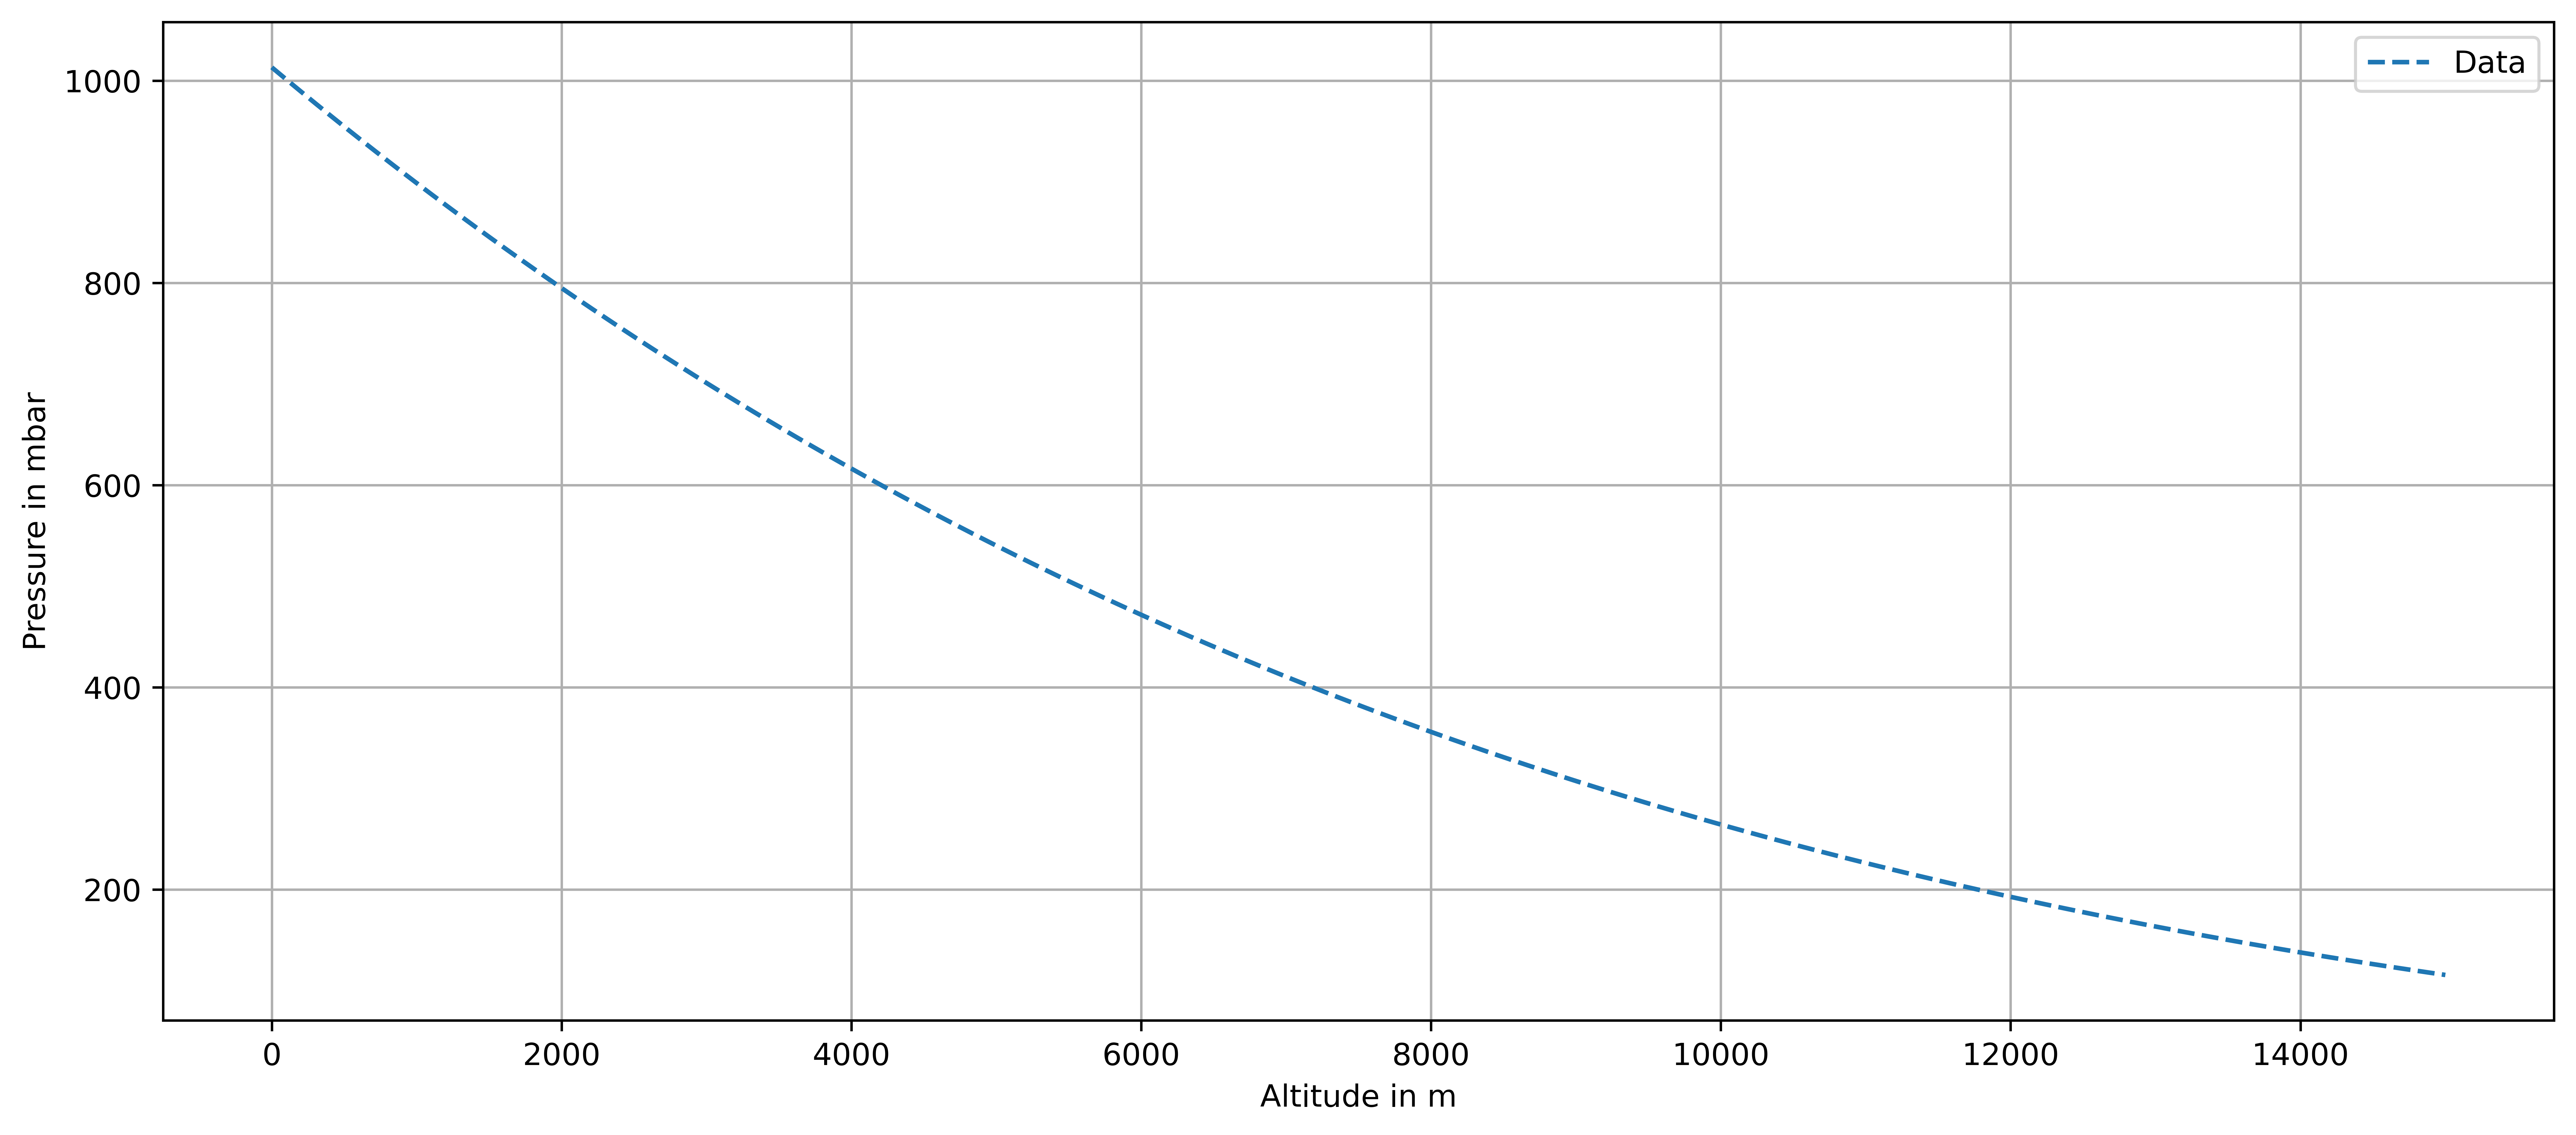

In [3]:
import numpy as np
import matplotlib.pyplot as plt

h = np.linspace(0,15000,150)

# pressure in mbar in function of altitude above sea level in m
# 1 Pa = 0.01 mbar
def pressure_vs_altitude(h):
    return 101325*(1-2.25577*10**(-5) * h)**(5.25588) / 100  # source: https://www.engineeringtoolbox.com/air-altitude-pressure-d_462.html

#Plot
plt.figure(figsize=(14, 6), dpi=800)
plt.plot(h, pressure_vs_altitude(h), "--", label = "Data")
plt.legend()
plt.xlabel("Altitude in m")
plt.ylabel("Pressure in mbar")
plt.grid()
plt.show()

So, we get the following plot showing the vertical muon intensity versus altitude.

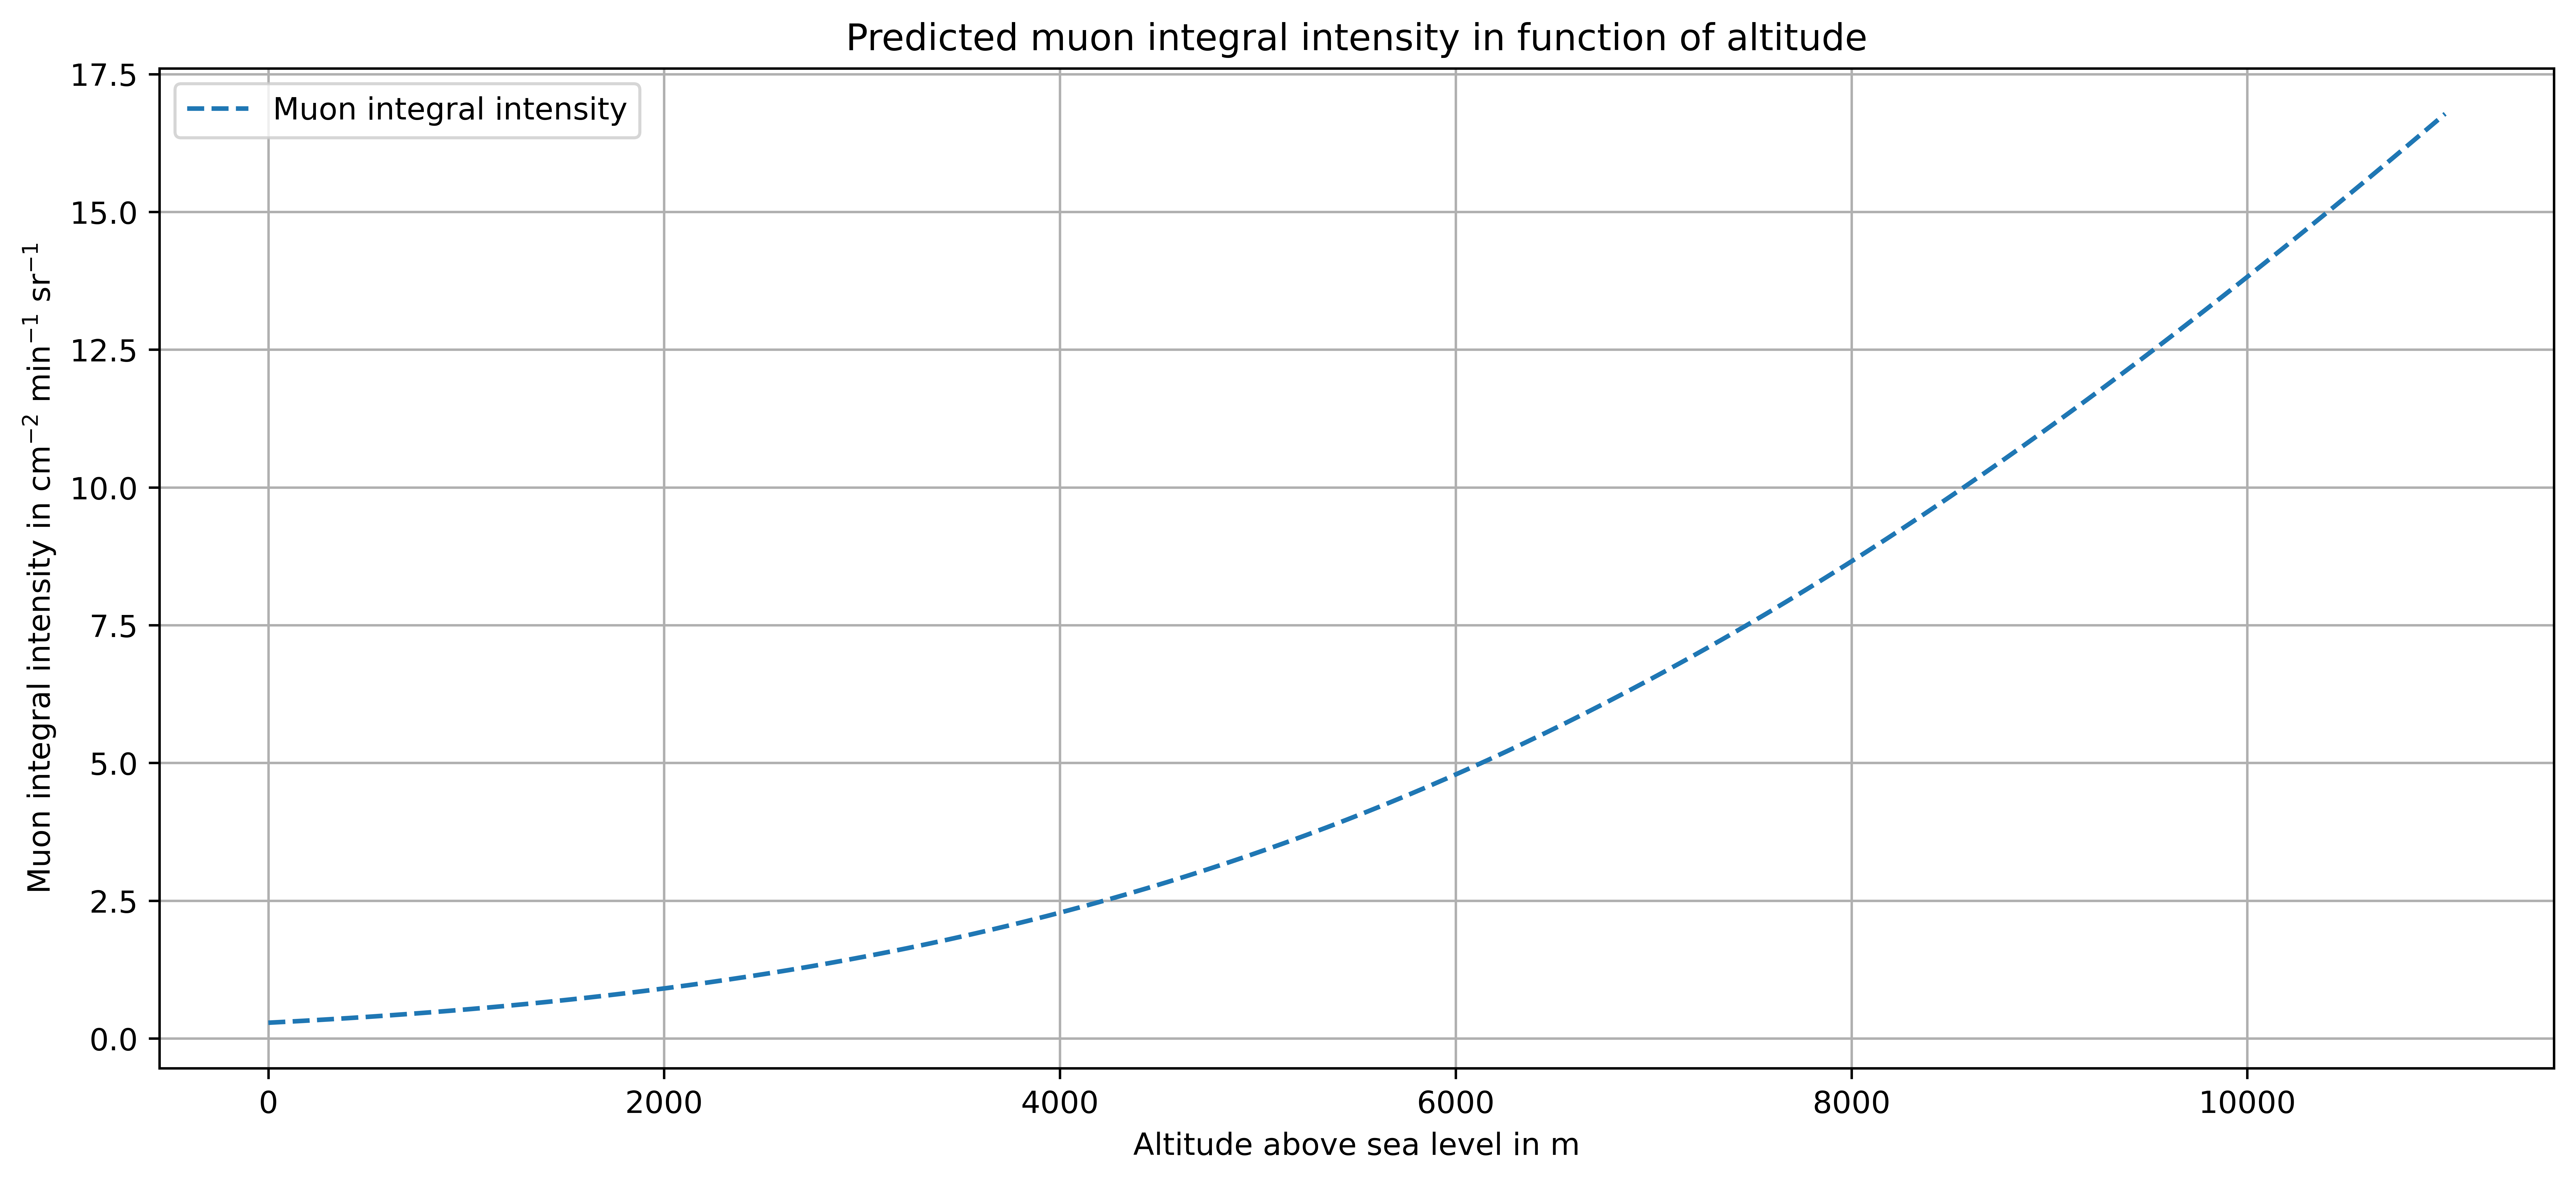

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# vertical (\theta = 0) muon intensity versus altitude
def muon_vs_alt(alt):
    return a * np.exp(b * pressure_vs_altitude(alt) + c) + d

alt = np.linspace(0,11000,110)

# Plot
plt.figure(figsize=(14, 6), dpi=800)
plt.title("Predicted muon integral intensity in function of altitude")
plt.plot(alt, muon_vs_alt(alt), "--", label = "Muon integral intensity")
plt.legend()
plt.xlabel("Altitude above sea level in m")
plt.ylabel("Muon integral intensity in cm$^{-2}$ min$^{-1}$ sr$^{-1}$")
plt.grid()
plt.show()


In our case, we have (if we now only consider the top plate of our setup) a surface of around $A = 4 \cdot (1.2 cm \cdot 5.8 cm) = 27.84 cm^2$


So in our case, we have:

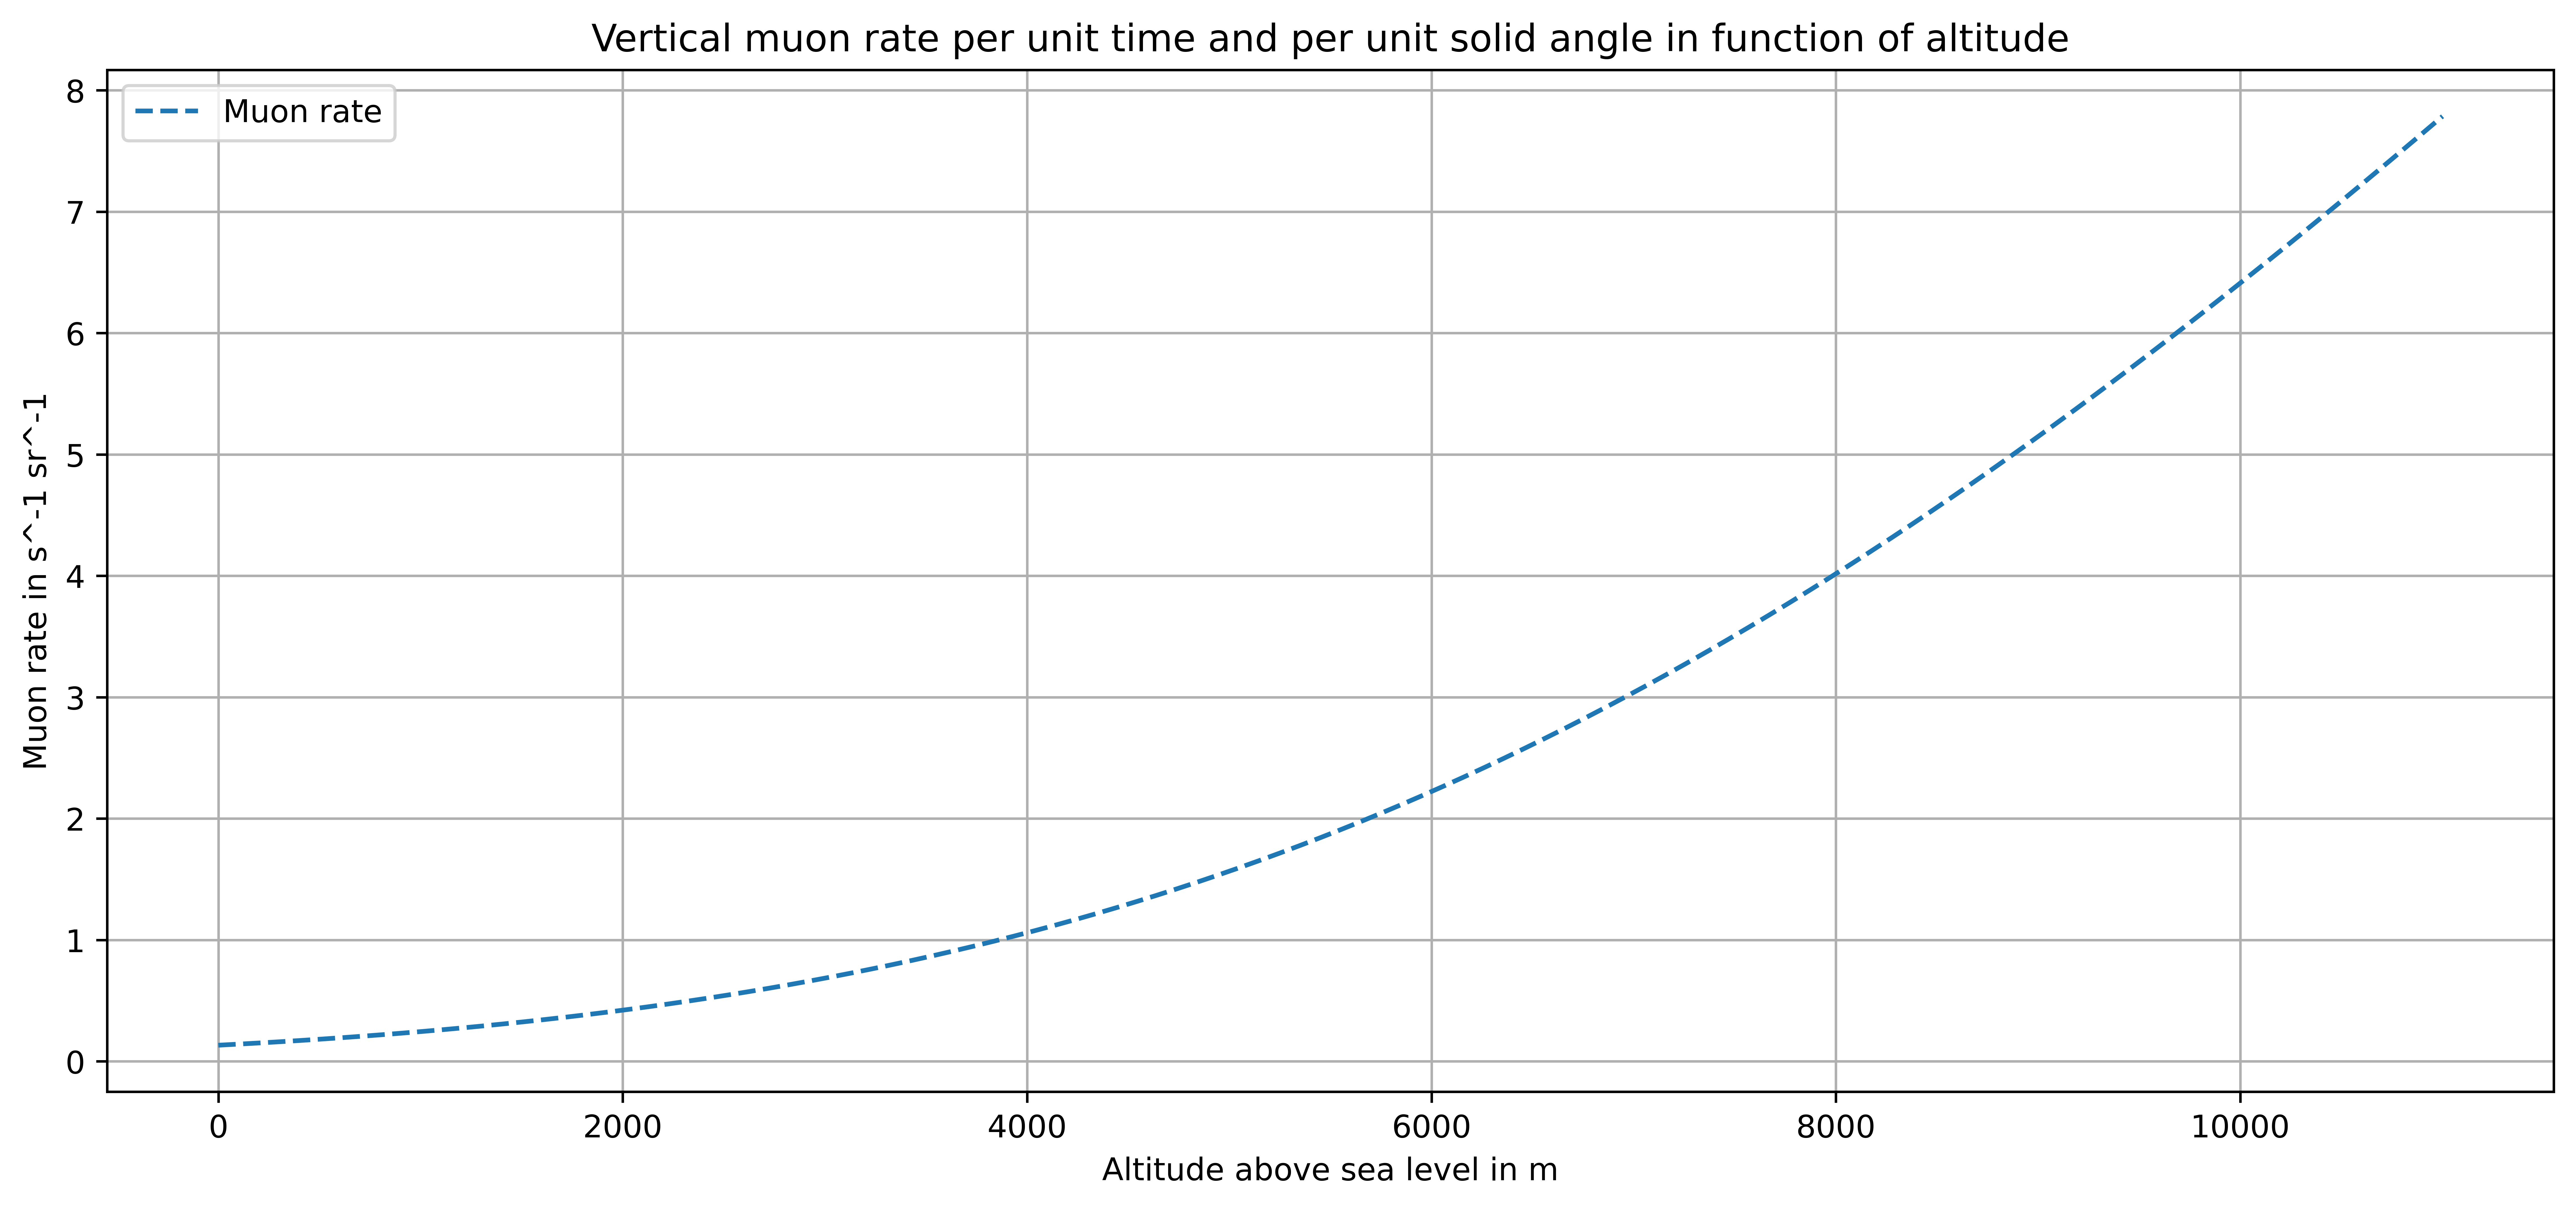

In [5]:
# Plot
plt.figure(figsize=(14, 6), dpi=800)
plt.title("Vertical muon rate per unit time and per unit solid angle in function of altitude")
plt.plot(alt, muon_vs_alt(alt)*27.84/60, "--", label = "Muon rate")
plt.legend()
plt.xlabel("Altitude above sea level in m")
plt.ylabel("Muon rate in s^-1 sr^-1")
plt.grid()
plt.show()

Let us compare this to actual results from papers:
For instance, we have at sea level an approximate rate of slightly less than one muon per square centimeter, per minute. Using the muon/altitude relation we have derived, this would then give the following flux at sea level for our setup: 

In [6]:
h_0 = muon_vs_alt(0)*27.84/60  
print(h_0)

0.13260138407424837


Remember, that this is the vertical intensity. Next, we want to calculate the total intensity. We have the following zenith angle dependence formula:
$I(\theta) = I(0)\cdot \cos^n (\theta)$, where $n_{air}$ is approximately $2.687\cdot 10^{19} cm^{-3}$. This enables us then to compute the general angular dependence of the muon integral intensity.

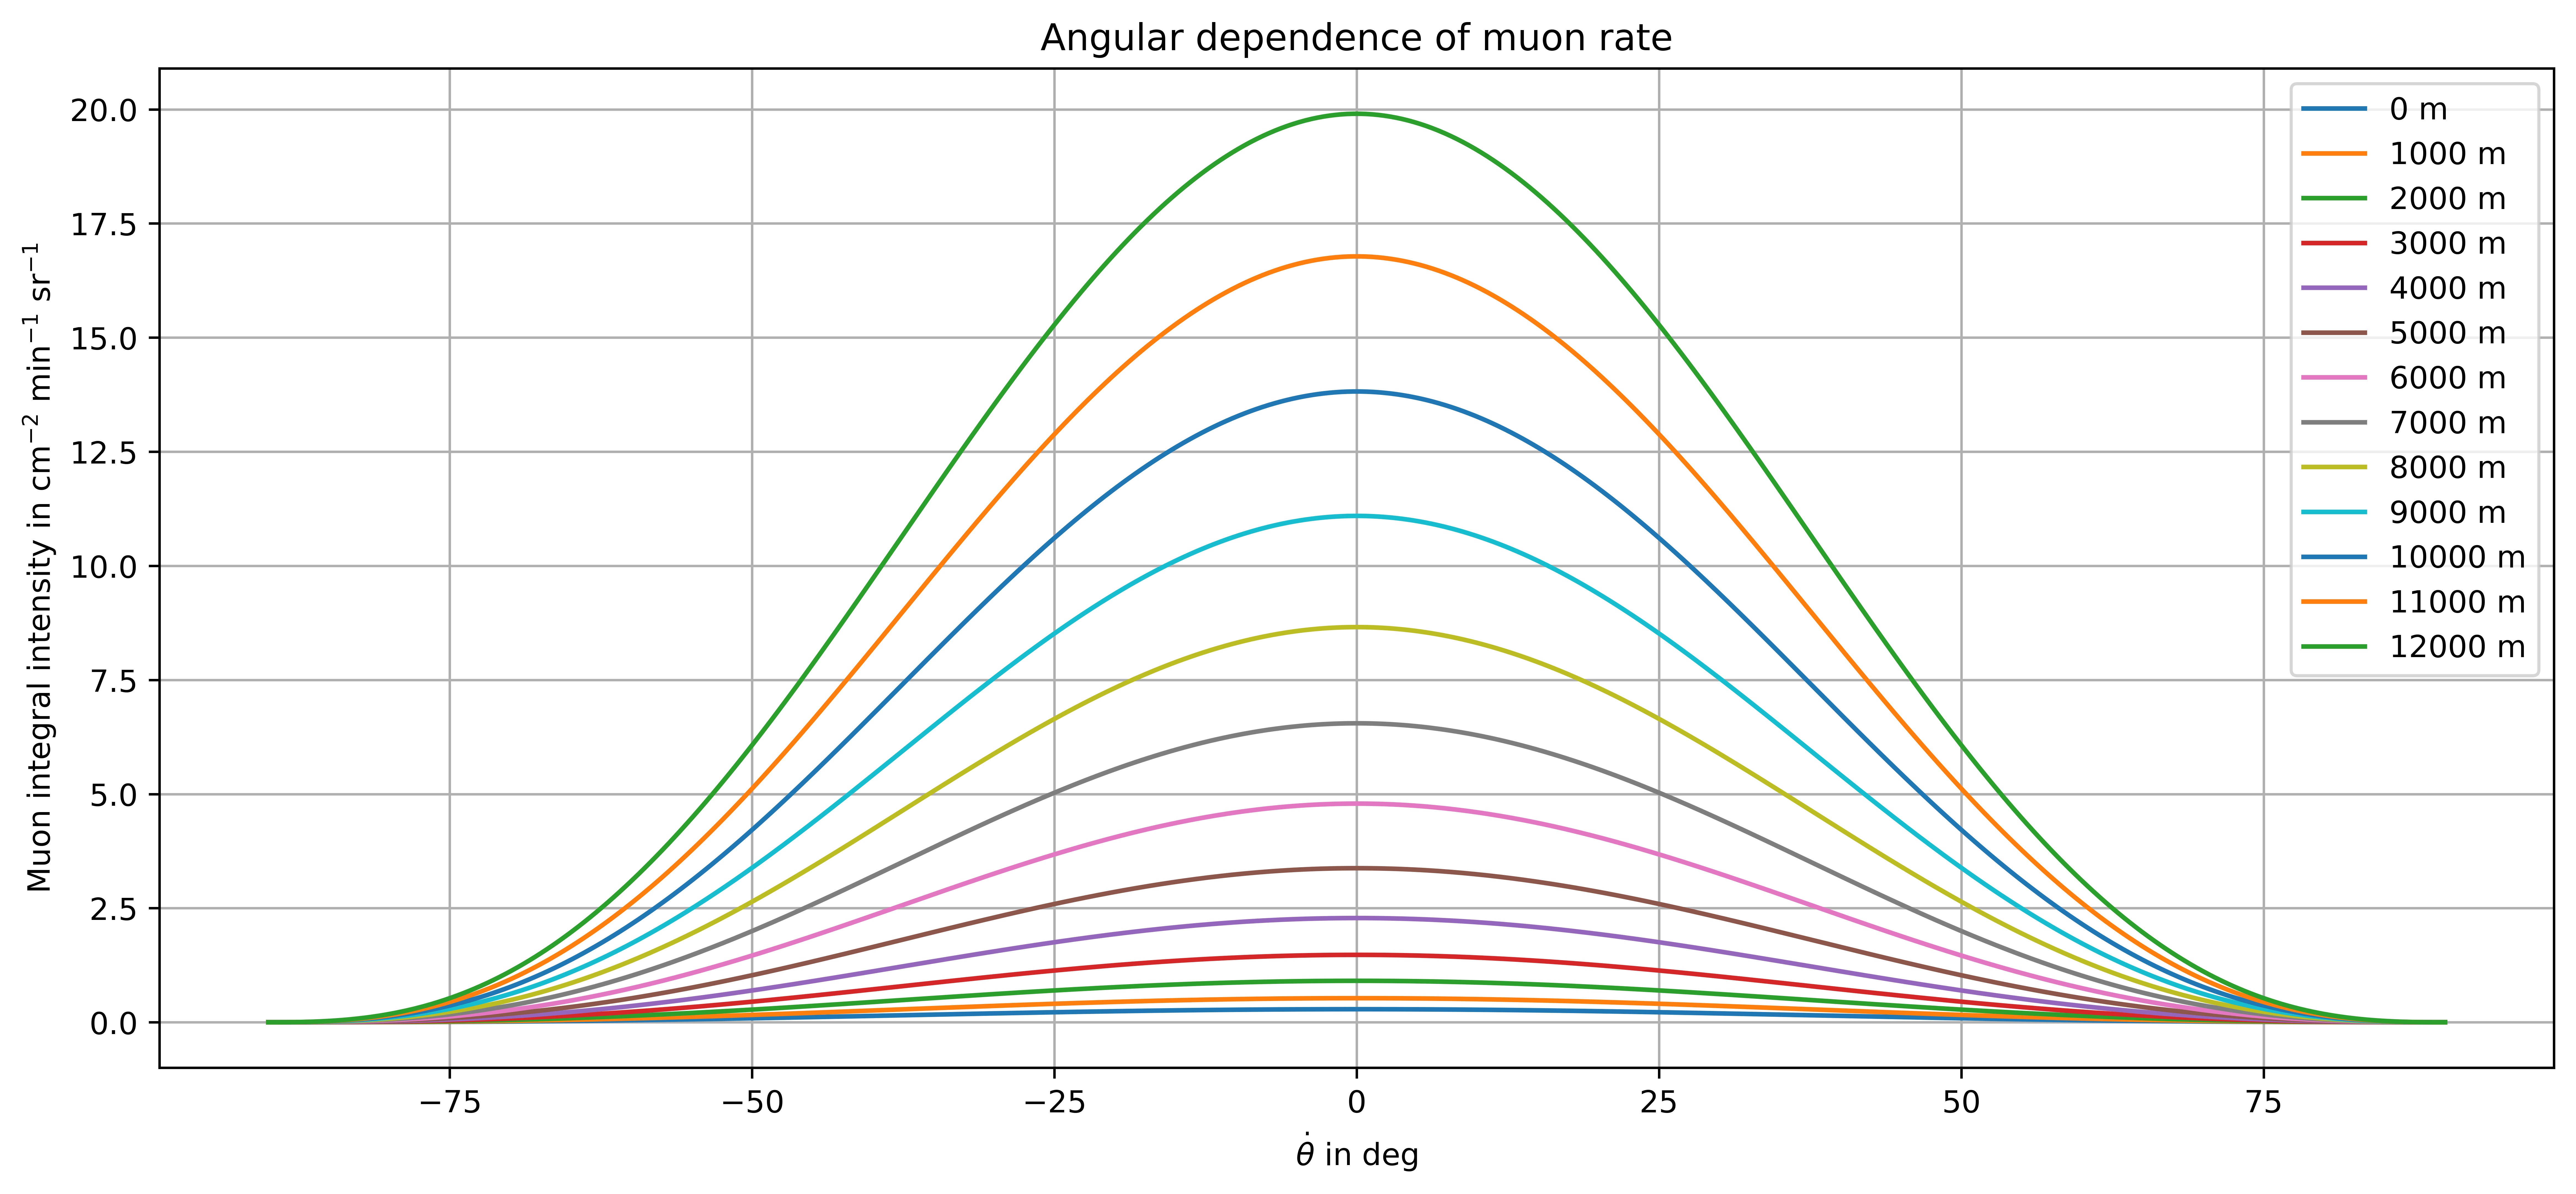

In [7]:
theta = np.linspace(-90, 90,360) # theta ranging from -90 to 90 degrees
theta_r = np.deg2rad(theta)
n_air = 2.687           # n_air according to book 

#n_air2 = 2.145         # according to https://www.mdpi.com/2410-390X/6/4/78, but n stays approx. constant up to 50 km

def I_theta(h, angle):
    return muon_vs_alt(h)*(np.cos(angle))**n_air

plt.figure(figsize=(14, 6), dpi=800)
plt.title("Angular dependence of muon rate")
plt.plot(theta, I_theta(0, theta_r) , "-", label = "0 m")
plt.plot(theta, I_theta(1000, theta_r) , "-", label = "1000 m")
plt.plot(theta, I_theta(2000, theta_r) , "-", label = "2000 m")
plt.plot(theta, I_theta(3000, theta_r) , "-", label = "3000 m")
plt.plot(theta, I_theta(4000, theta_r) , "-", label = "4000 m")
plt.plot(theta, I_theta(5000, theta_r) , "-", label = "5000 m")
plt.plot(theta, I_theta(6000, theta_r) , "-", label = "6000 m")
plt.plot(theta, I_theta(7000, theta_r) , "-", label = "7000 m")
plt.plot(theta, I_theta(8000, theta_r) , "-", label = "8000 m")
plt.plot(theta, I_theta(9000, theta_r) , "-", label = "9000 m")
plt.plot(theta, I_theta(10000, theta_r) , "-", label = "10000 m")
plt.plot(theta, I_theta(11000, theta_r) , "-", label = "11000 m")
plt.plot(theta, I_theta(12000, theta_r) , "-", label = "12000 m")
plt.legend()
#plt.xlabel("r${\theta}$ in deg.")
plt.xlabel(r"$\dot{\theta}$ in deg")
plt.ylabel("Muon integral intensity in cm$^{-2}$ min$^{-1}$ sr$^{-1}$")
plt.grid()
plt.show()

Now, we can integrate this over the hemisphere, so over $\theta$ from $0$ to $\pi/2$ and over $\phi$ from $0$ to $2\pi$, to get the total intensity. We thus have: $I_{full} = \int_{0}^{2\pi} \int_{0}^{\pi/2} I(0)\cdot \cos^n (\theta) sin(\theta) d\theta d\phi$,

In [8]:
# Expression: I(theta) = muon_vs_alt(h)*(np.cos(theta))**n_air -> integrate this over hemisphere


import scipy.integrate as integrate

cos_integrand,_ = integrate.quad(lambda t: 2*np.pi*np.cos(t)**n_air*np.sin(t), 0, np.pi/2)

# So we get the following muon integral intensity for the different heights integrated over the angles -pi/2 to pi/2

I_g_0 = muon_vs_alt(0)*cos_integrand # general muon intensity for altitude h=0
I_g_500 = muon_vs_alt(500)*cos_integrand
I_g_1000 = muon_vs_alt(1000)*cos_integrand
I_g_2000 = muon_vs_alt(2000)*cos_integrand
I_g_3000 = muon_vs_alt(3000)*cos_integrand
I_g_4000 = muon_vs_alt(4000)*cos_integrand
I_g_5000 = muon_vs_alt(5000)*cos_integrand
I_g_6000 = muon_vs_alt(6000)*cos_integrand
I_g_7000 = muon_vs_alt(7000)*cos_integrand
I_g_8000 = muon_vs_alt(8000)*cos_integrand
I_g_9000 = muon_vs_alt(9000)*cos_integrand
I_g_10000 = muon_vs_alt(10000)*cos_integrand
I_g_11000 = muon_vs_alt(11000)*cos_integrand
I_g_12000 = muon_vs_alt(12000)*cos_integrand

# make table with data

from tabulate import tabulate

t_int = [['Altitude [m]', 'Muon integral intensity [cm^-2 min^-1]'], 
         [0, I_g_0], [500, I_g_500],[1000, I_g_1000], [2000, I_g_2000], [3000, I_g_3000], [4000, I_g_4000], [5000, I_g_5000], [6000, I_g_6000], [7000, I_g_7000], [8000, I_g_8000], [9000, I_g_9000], [10000, I_g_10000], [11000, I_g_11000],[12000, I_g_12000]]

print(tabulate(t_int))


#print(tabulate(t_int, tablefmt="latex"))

------------  --------------------------------------
Altitude [m]  Muon integral intensity [cm^-2 min^-1]
0             0.4870087984580455
500           0.6678828178069985
1000          0.8984645306311749
2000          1.5472380147041949
3000          2.5159576849461924
4000          3.8908046671894305
5000          5.751985871565524
6000          8.16322614864462
7000          11.162139859968638
8000          14.753258313789589
9000          18.904965920288593
10000         23.550804985737408
11000         28.5947788449895
12000         33.9196241796892
------------  --------------------------------------


We would expect the value $1$ muon $min^{-1} cm^{-2}$ at sea level, however, here we get slightly less namely $0.5$ muon $min^{-1} cm^{-2}$. We would argue that this is due to the fact that our approximation relies on empirical data that was not sufficient to precisely determine the expected flux at sea level. This might result in a slightly larger flux when we will actually measure.

## 2) Muon flux rate for cubic setup

Finally, we adapt this to our whole qubic setup. The "top layer" has an area of around $27.84 cm^2$ (here, the flux will be computed as above). Then, one "sideplate" has an area of $8\cdot 1.2 cm \cdot 1.2 cm + 2\cdot 5.8 cm\cdot1.2 cm = 25.44 cm^2$. Here, $\theta$ ranges from $0$ to $\pi/2$ and $\phi$ goes from $0$ to $\pi$. Since the angular distribution is symmetric, we can assume the same for the other sideplates. Thus, to sum up, we have:

Top plate : $27.84 cm^2$, where $\theta$ ranges from $0$ to $\pi/2$ and $\phi$ from $0$ to $2\pi$ 

4 side plates: $4 \cdot 25.44 cm^2 = 101.76 cm^2 $ , where $\theta$ ranges from $0$ to $\pi/2$ and $\phi$ goes from $0$ to $\pi$

In [9]:
CAD1 = Image(filename=('./CAD_rods.png'),width=500, height=500)
CAD1

FileNotFoundError: [Errno 2] No such file or directory: './CAD_rods.png'

In [ ]:
CAD2 = Image(filename=('./CAD_cube.png'),width=500, height=500)
CAD2

In [ ]:
# essentially, we need to compute the same as above, just for a different angular range (for the sideplates)

import scipy.integrate as integrate

cos_integrandfull,_ = integrate.quad(lambda t: 2*np.pi*np.cos(t)**n_air*np.sin(t), 0, np.pi/2)
cos_integrandhalf,_ = integrate.quad(lambda t: np.pi*np.cos(t)**n_air*np.sin(t), 0, np.pi/2)

# Compute muon flux in s^-1 for qubic setup

# Top plate
def mf_tp(h):
    return muon_vs_alt(h)*cos_integrandfull * 27.84/60

# 4 side plates
def mf_sps(h):
    return muon_vs_alt(h)*cos_integrandhalf * 101.76/60

# all together
def mf(h):
    return mf_tp(h) + mf_sps(h)


# make table with data

table = [['Altitude [m]', 'Muon flux rate [s^-1]'], 
         [0, mf(0)], [500, mf(500)],[1000, mf(1000)], [2000, mf(2000)], [3000, mf(3000)], [4000, mf(4000)], [5000, mf(5000)], [6000, mf(6000)], [7000, mf(7000)], [8000, mf(8000)], [9000, mf(9000)], [10000, mf(10000)], [11000, mf(11000)],[12000, mf(12000)]]

print(tabulate(table))

0.87/(2*np.pi)

#print(tabulate(table, tablefmt="latex"))

In [ ]:
# Plot bar diagram

height = np.array([mf(0), mf(1000), mf(2000), mf(3000), mf(4000), mf(5000), mf(6000), mf(7000), mf(8000), mf(9000), mf(10000), mf(11000), mf(12000)])
bars = np.array([0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000])

y_pos = np.arange(len(bars))

plt.figure(figsize=(14, 6), dpi=800)

# Create bars
plt.grid()
plt.bar(y_pos, height)
plt.xlabel("Altitude in m")
plt.ylabel("Total muon flux rate in s$^{-1}$")

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

# Fitting curve diagram

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Fit the function e * np.exp(f * t + g) + h to x and y

e_guess = 0.002
f_guess = 0.00001
g_guess = 0.6
h_guess = 0

popt, pcov = curve_fit(
    lambda t, e, f, g,h : e * np.exp(f * t + g) + h,
    bars, height, p0=(e_guess, f_guess, g_guess, h_guess))

# The optimised values of the parameters are
e = popt[0]
f = popt[1]
g = popt[2]
h = popt[3]


# Fitting parameters
print("e:", e)
print("f:", f)
print("g:", g)
print("h:", h)


# Create the fitted curve
bars_fit = np.linspace(0, 12000, 120)
height_fit = e * np.exp(f * bars_fit + g) + h

plt.figure(figsize=(14, 6), dpi=800)
plt.plot(bars, height, ".", label = "Data")
plt.plot(bars_fit, height_fit, '--', color='red', label = "Fit")
plt.legend()
plt.xlabel("Altitude [m]")
plt.ylabel("Total muon flux in s$^{-1}$")
plt.title("Cubic setup")
plt.grid()
plt.show()

From our simulations team, we acquired the simulated flight path and velocity (in z-direction) from our rocket, but only for around 6500 m. They are depicted in the following cells.

In [ ]:
fig1 = Image(filename=('./altitude-1.png'))
fig1

In [ ]:
fig2 = Image(filename=('./velocity-1.png'))
fig2

We also plotted the time versus altitude and velocity from last year's rocket and we see that our estimated velocities for the different stages should be valid.

In [ ]:
fig3 = Image(filename=('./Altitude_Helvetia.png'))
fig3

In [ ]:
fig4 = Image(filename=('./Velocity_Helvetia.png'))
fig4

Now, we seek to find the number of muons per second for the different stages. 

According to the recovery team leader, the (vertical) drogue velocity can be well approximated by 27.0 m/s while the main velocity is around 6.3 m/s.

We now want to calculate how many muons we seek to detect in TBD m intervals. We therefore take the average muon rate to be the mean of the muon rates of the two considered altitudes, i.e. the total number of muons we expect to detect going from 12000 to 11500 in the drogue stage would be (mf(12000)+ mf(11500))/2 * 500/27

In [ ]:
v_d = 27 # drogue stage velocity
v_m = 6.3 # main stage velocity
alt_int = 500 # altitude interval


table2 = [['Altitude interval', 'Expected number of detected muons']] # to display expected count of muons for the different altitude intervals
val = [] # list to count total number of muons

i = 11000        # expected apogee of rocket Bernoulli
while i >= 1000:
    table2.append([str(i) + " to " + str(i-alt_int),(mf(i)+ mf(i-alt_int))/2 * alt_int/v_d])
    val.append((mf(i)+ mf(i-alt_int))/2 * alt_int/v_d)
    i = i - alt_int
while i >= alt_int:
    table2.append([str(i) + " to " + str(i-alt_int),(mf(i)+ mf(i-alt_int))/2 * alt_int/v_m])
    val.append((mf(i)+ mf(i-alt_int))/2 * alt_int/v_m)
    i = i - alt_int

print(tabulate(table2))

print("Total number of muons:", np.sum(val))



# Approximate qubic setup as sphere with radius $r$

Now, we assume that our cube can be approximated by a sphere, such that we do not need to differentiate between side and top plate. The calculations are very similar to the above, however we need to use different boundaries. Indeed, our total intensity can be computed as follows:

$I_{tot} = \int_{0}^{2\pi}\int_{0}^{\pi/2} I(0)\;cos(\theta)^n \;sin(\theta) d\theta d\phi$

We consider two cases: 

i) a sphere that it is fully contained inside a cube with side length 5.8 cm 

ii)a cube with side length 5.8 cm contained in a sphere such that the sphere only touches the corners of the cube 


Finding the radii of the two cases:

i) The inscribed sphere has its center at the center of the cube and its radius is equal to half the side length of the cube, so $5.8/2 = 2.9$ cm

ii) Since the cube has side length 5.8 cm, the distance from the corner to the center is half of the diagonal of the cube, which can be calculated using the Pythagorean theorem: 
diagonal $= \sqrt(5.8^2 + 5.8^2 + 5.8^2) = 5.8 * \sqrt 3$. So the distance is equal to: distance = diagonal $/ 2 = 5.8 * \sqrt 3 \; / \; 2$ cm

In [ ]:
# Compute muon flux in s^-1 for spherical setups

# integration part  
intsphere,_ = integrate.quad(lambda t: 2*np.pi*np.cos(t)**n_air*np.sin(t), 0, np.pi/2)

# muon flux rate for sphere with radius r in function of height
def mf_s(h,r):
    return 2*np.pi*muon_vs_alt(h)*intsphere * r**2/60

In [ ]:
# Muon flux rate for case i) in relation to altitude

# Radius of sphere
r_1 = 2.9  #radius of sphere within the cube ; 5.8/2

# Print some values for given altitudes
table_s1 = [['Altitude [m]', 'Muon flux rate [s^-1]'], 
         [0, mf_s(0,r_1)], [1000, mf_s(1000,r_1)], [2000, mf_s(2000,r_1)], [3000, mf_s(3000,r_1)], [4000, mf_s(4000,r_1)], [5000, mf_s(5000,r_1)], [6000, mf_s(6000,r_1)], [7000, mf_s(7000,r_1)], [8000, mf_s(8000,r_1)], [9000, mf_s(9000,r_1)], [10000, mf_s(10000,r_1)], [11000, mf_s(11000,r_1)],[12000, mf_s(12000,r_1)]]

print(tabulate(table_s1))

In [ ]:
# Muon flux rate for case ii) in relation to altitude

# Radius of sphere
r_2 = 5.8 * np.sqrt(3) / 2  #radius of sphere containing the cube ; via Pythagoras

# Print some values for given altitudes
table_s2 = [['Altitude [m]', 'Muon flux rate [s^-1]'], 
         [0, mf_s(0,r_2)], [1000, mf_s(1000,r_2)], [2000, mf_s(2000,r_2)], [3000, mf_s(3000,r_2)], [4000, mf_s(4000,r_2)], [5000, mf_s(5000,r_2)], [6000, mf_s(6000,r_2)], [7000, mf_s(7000,r_2)], [8000, mf_s(8000,r_2)], [9000, mf_s(9000,r_2)], [10000, mf_s(10000,r_2)], [11000, mf_s(11000,r_2)],[12000, mf_s(12000,r_2)]]

print(tabulate(table_s2))

In [ ]:
# Plotting the two setups to get a visual idea

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a cube with side length 5.8
cube_size = 5.8
cube = np.array([[-1, -1, -1],
                 [-1,  1, -1],
                 [ 1,  1, -1],
                 [ 1, -1, -1],
                 [-1, -1,  1],
                 [-1,  1,  1],
                 [ 1,  1,  1],
                 [ 1, -1,  1]]) * cube_size / 2

# Create a sphere with radius sqrt(2)*2.9
sphere_radius_1 = 5.8 * np.sqrt(3) / 2
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = sphere_radius_1 * np.cos(u) * np.sin(v)
y = sphere_radius_1 * np.sin(u) * np.sin(v)
z = sphere_radius_1 * np.cos(v)

# Plot the cube and sphere in the first subplot
fig = plt.figure(figsize=(10, 5), dpi=800)


ax = fig.add_subplot(121, projection='3d')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(-6, 6)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Cube inside Sphere')

edges = [(0, 1), (1, 2), (2, 3), (3, 0),
         (4, 5), (5, 6), (6, 7), (7, 4),
         (0, 4), (1, 5), (2, 6), (3, 7)]
for a, b in edges:
    ax.plot(cube[[a,b], 0], cube[[a,b], 1], cube[[a,b], 2], color='b')
ax.plot_wireframe(x, y, z, color='r', alpha=0.2)

# Create a sphere with radius 2.9
sphere_radius_2 = 2.9
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = sphere_radius_2 * np.cos(u) * np.sin(v)
y = sphere_radius_2 * np.sin(u) * np.sin(v)
z = sphere_radius_2 * np.cos(v)

# Plot the cube and sphere in the second subplot
ax = fig.add_subplot(122, projection='3d')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(-6, 6)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Sphere inside Cube ')

for a, b in edges:
    ax.plot(cube[[a,b], 0], cube[[a,b], 1], cube[[a,b], 2], color='b')
ax.plot_wireframe(x, y, z, color='r', alpha=0.2)

# Display the plot
plt.show()

## Conclusion

In [ ]:
# Compare muon flux for cubic and the two spherical setups

# create the header row for the merged table
header = ["Altitude [m]", "Muon flux rate - Cube [s^-1]", "Muon flux rate - Sphere (i) [s^-1]", "Muon flux rate - Sphere (ii) [s^-1]"]

# initialize the merged table with the header row
merged_table = [header]

# loop over the rows in the original tables and merge them
for i in range(1, len(table)):
    row = [table[i][0], table[i][1]]
    for j in range(1, len(table_s1)):
        if table_s1[j][0] == table[i][0]:
            row.append(table_s1[j][1])
            break
    for k in range(1, len(table_s2)):
        if table_s2[k][0] == table[i][0]:
            row.append(table_s2[k][1])
            break
    merged_table.append(row)

# print the merged table
print(tabulate(merged_table))

In [ ]:
# Plot different setups to compare

# list entries
list_alt = [elem[0] for elem in table[1:]]
list_c = [elem[1] for elem in table[1:]]
list_s1 = [elem[1] for elem in table_s1[1:]]
list_s2 = [elem[1] for elem in table_s2[1:]]

# Plot
plt.figure(figsize=(14, 6), dpi=800)
plt.plot(list_alt, list_c, "--",color="r",label = "Cube")
plt.plot(list_alt, list_s1, "--.",color="orange", label = "Sphere (i)")
plt.plot(list_alt, list_s2, ":", color="g",label = "Sphere (ii)")
plt.fill_between(list_alt, list_s1, list_s2, alpha=0.05, color='blue', label="Range of expected muon flux")
plt.legend()
plt.title("Muon flux rates for different setups")
plt.xlabel("Altitude [m]")
plt.ylabel("Muon flux [s^-1]")
plt.grid()
plt.show()

Since our result for the cube lies within these two models, we would argue that the result for the calculation of our qubic setup is plausible.